## Imports

In [1]:
import torch
import torchvision
from torchvision import transforms
import timm

from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer, LightningModule

num_cpus = torch.multiprocessing.cpu_count()
DEVICE = "gpu" if torch.cuda.is_available() else "cpu"

## Dataset

In [2]:
from dataset import IntelDataModule

data_Path = 'Agricultural-crops'
batch_size = 4

datamodule = IntelDataModule(train_data_dir=data_Path,
                            test_data_dir=data_Path,
                            num_workers=num_cpus,
                            batch_size=batch_size)
datamodule.setup()

## Model

In [3]:
from model import NNModule
net = timm.create_model("resnet18", pretrained=True, num_classes=30)
model = NNModule(net=net,class_names=datamodule.classes)

In [4]:
logger = TensorBoardLogger(save_dir='.', name="tensorboard")

In [5]:
max_epochs = 3
num_gpus = 1

trainer = Trainer(
            accelerator=DEVICE,
            max_epochs=max_epochs,
            devices=num_gpus, 
            logger=logger,
            num_sanity_val_steps=0,
            )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [6]:
trainer.fit(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name      | Type                      | Params
---------------------------------------------------------
0  | net       | ResNet                    | 11.2 M
1  | loss      | CrossEntropyLoss          | 0     
2  | train_acc | MulticlassAccuracy        | 0     
3  | val_acc   | MulticlassAccuracy        | 0     
4  | test_acc  | MulticlassAccuracy        | 0     
5  | train_pr  | MulticlassPrecision       | 0     
6  | val_pr    | MulticlassPrecision       | 0     
7  | test_pr   | MulticlassPrecision       | 0     
8  | train_rec | MulticlassRecall          | 0     
9  | val_rec   | MulticlassRecall          | 0     
10 | test_rec  | MulticlassRecall          | 0     
11 | train_f1  | MulticlassF1Score         | 0     
12 | val_f1    | MulticlassF1Score         | 0     
13 | test_f1   | MulticlassF1Score         | 0     
14 | conf_mat  | MulticlassConfusionMatrix | 0     
---------------------------------------------------------
11.2 M   

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test/acc_epoch       │    0.6276587247848511     │
│       test/f1_epoch       │    0.5983239412307739     │
│      test/loss_epoch      │    1.3592458963394165     │
│       test/pr_epoch       │    0.6447150707244873     │
│      test/rec_epoch       │    0.6276587247848511     │
└───────────────────────────┴───────────────────────────┘

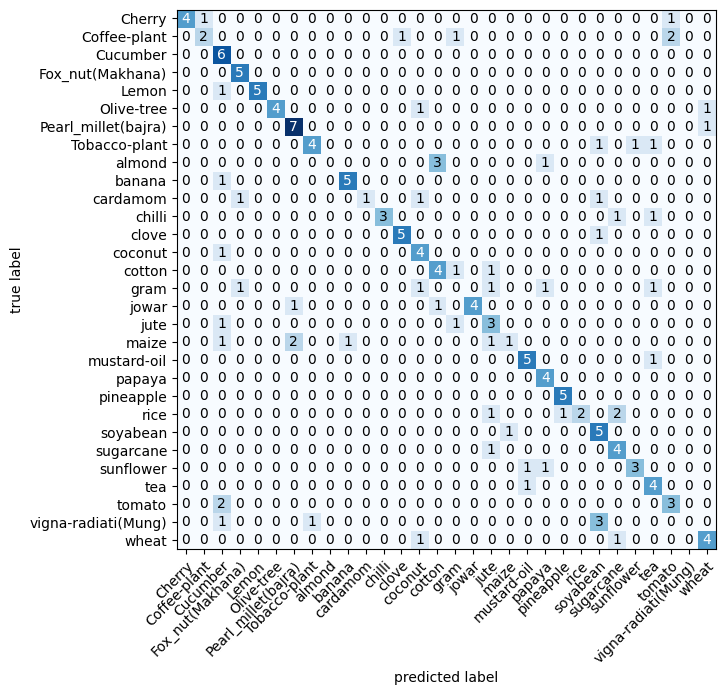

In [7]:
test_results = trainer.test(model, datamodule)